<h2>Импортируем основные библиотеки и напишем реализацию линейной регрессии

In [21]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero


class LinearRegressor:
    def __init__(self, number_of_coefs):
        self.w = np.ones(number_of_coefs)
        self.b = 1.0

    def predict(self, x):
        return np.dot(x, self.w) + self.b

    def MSE(self, X, y):
        sum_of_squares = 0
        for i in range(len(X)):
            sum_of_squares += (self.predict(X[i]) - y[i])**2
        return 1/len(X) * sum_of_squares

    def calc_gradient(self, X, y):
        b = 0
        w = np.zeros(len(X[0]))
        for i in range(len(X)):
            b += (self.predict(X[i]) - y[i])
            w += (self.predict(X[i]) - y[i]) * (X[i])
        b /= len(X)
        w /= len(X)
        return w, b

    def fit(self, X, y, epsilon, learning_rate):
        mse_old = 0
        mse = self.MSE(X, y)
        while abs(mse - mse_old) > epsilon:
            mse_old = self.MSE(X, y)
            gradient = self.calc_gradient(X, y)
            self.b = self.b - learning_rate * gradient[1]
            self.w = self.w - learning_rate * gradient[0]
            mse = self.MSE(X, y)
        # print(mse, self.b, self.w)


<h2>Создадим набор данных(т.е. набор точек) со случайным шумом

In [22]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=8, shuffle=True)

<h2>Обучим модель на созданных данных и сделаем предсказания

In [27]:
regressor = LinearRegressor(1)
regressor.fit(X, y, 0.5, 1)
Y_pred = []
for x in X:
    Y_pred.append(regressor.predict(x))

<h2>Построим в системе координат полученную прямую и точки из набора данных

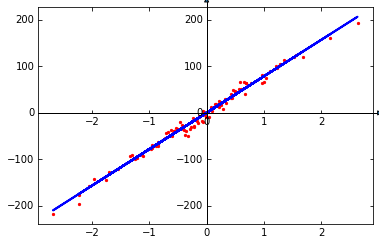

In [28]:
fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
     ax.axis[direction].set_axisline_style("-|>")
     ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(True)

    ax.scatter(X, y, color='red', s=5)
    ax.plot(X, Y_pred, color='blue', linewidth=2)

    plt.show()
 

<h2>Выведем полученные коэффициенты

In [29]:
print(regressor.w, regressor.b)

[78.50508985] 0.3764338119189168


In [30]:
regressor.MSE(X, y)

74.61263481428647